In [161]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve

# ***Planning and Data Understanding and EDA***

In [162]:
# Read the data
df_1 = pd.read_csv('../Part1/HBN.csv', index_col='Unnamed: 0')

# Check the data information
df_1.info()
df_1.describe()

# Check the table
df_1

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Enrol_Season                            3960 non-null   object 
 2   Age                                     3960 non-null   int64  
 3   Sex                                     3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-Score                              2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    float64
 

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


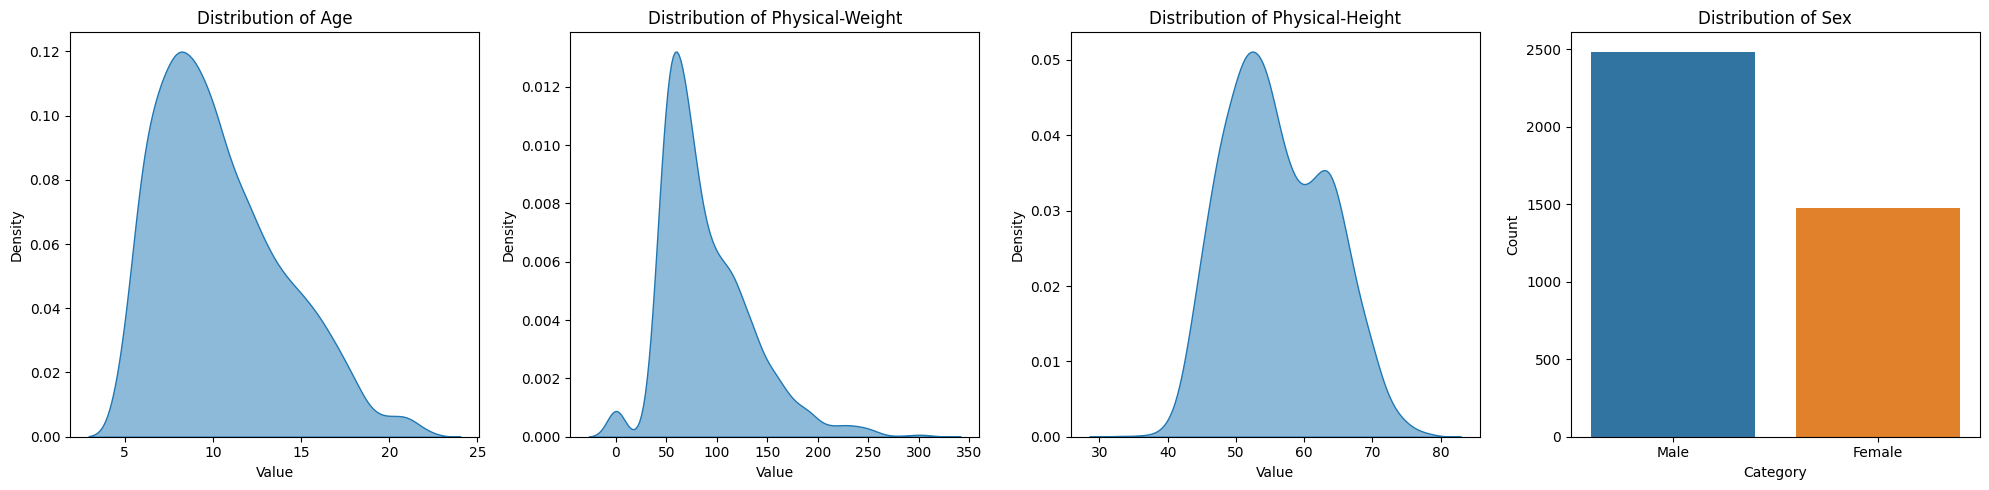

In [163]:
# Check the distribution of the some variables
columns_to_plot = ['Age', 'Physical-Weight', 'Physical-Height', 'Sex',] 
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  

for i, column in enumerate(columns_to_plot):  
    if column == 'Sex':  
        sns.countplot(x=column, data=df_1, ax=axes[i])
        axes[i].set_xticklabels(['Male', 'Female'])
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Category')  
        axes[i].set_ylabel('Count')  
    else:  
        sns.kdeplot(df_1[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  

plt.tight_layout()  
plt.show()  

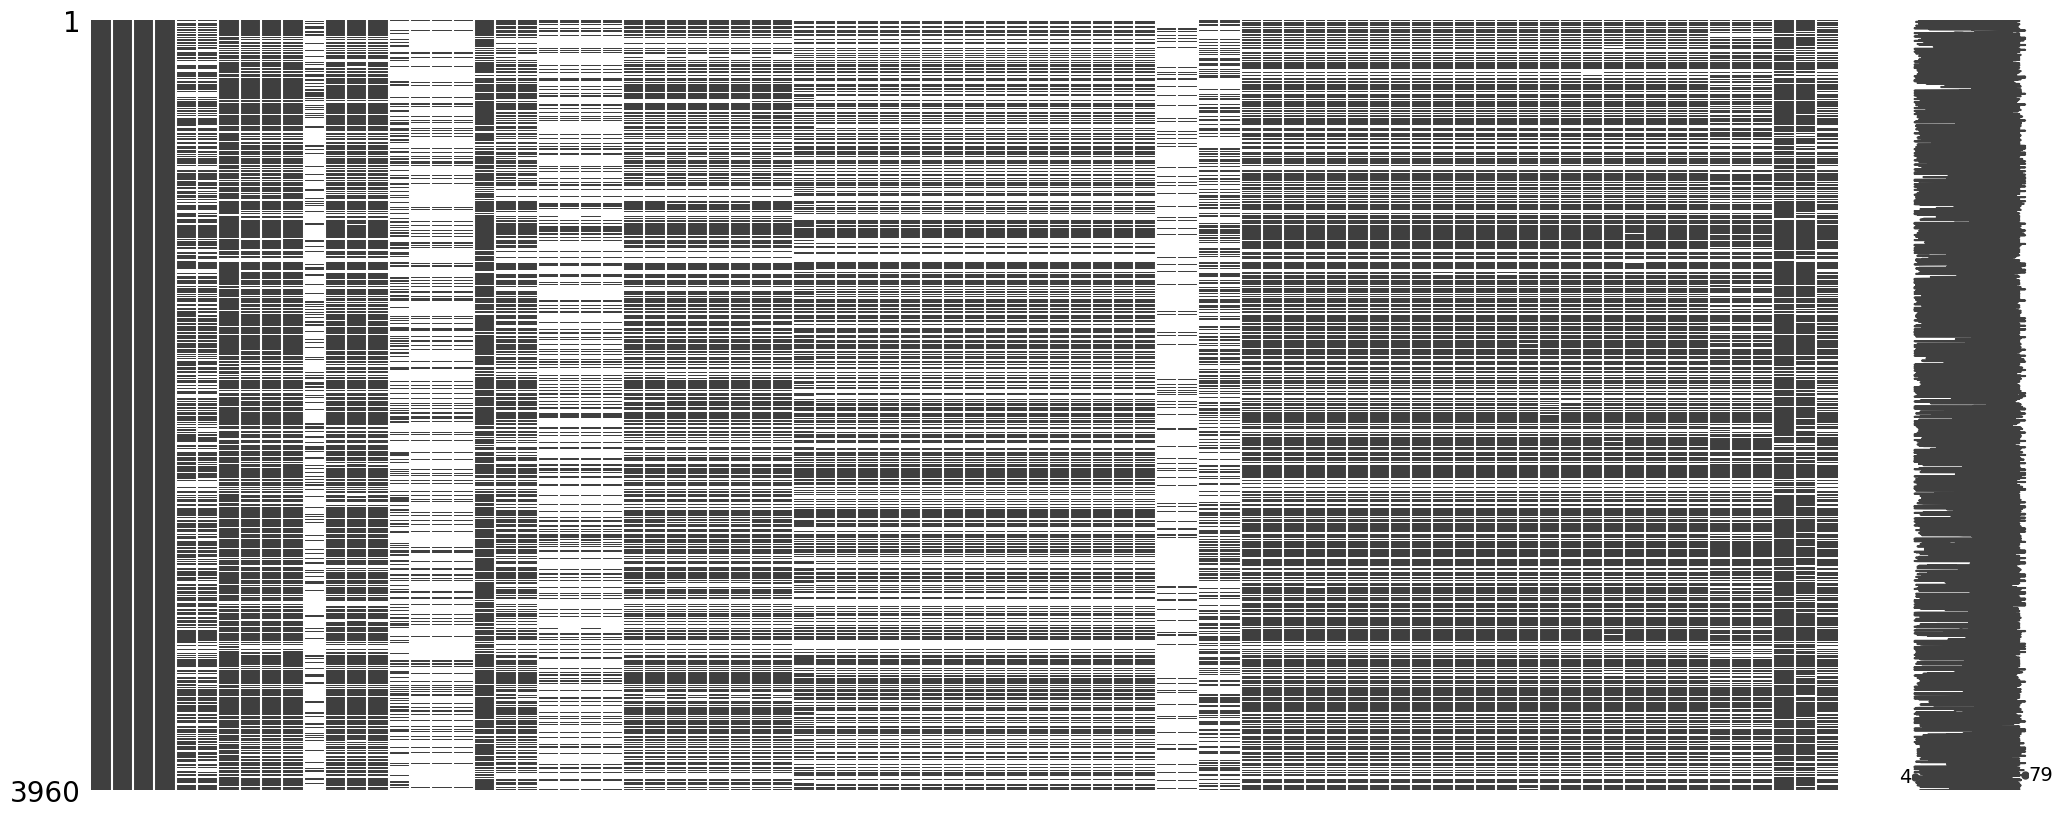

In [164]:
msno.matrix(df_1)
plt.show()

In [165]:
# Check the number and percentage of missing values
missing_values = df_1.isnull().sum()
missing_percentage = (df_1.isnull().sum() / len(df_1)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
id,0,0.000000
Enrol_Season,0,0.000000
Age,0,0.000000
Sex,0,0.000000
CGAS-Season,1405,35.479798
...,...,...
SDS-SDS_Total_Raw,1351,34.116162
SDS-SDS_Total_T,1354,34.191919
PreInt_EduHx-Season,420,10.606061
PreInt_EduHx-computerinternet_hoursday,659,16.641414


In [166]:
df_1[['Physical-BMI', 'BIA-BIA_BMI']] # Values are the same but Physical-BMI has less Nan Values

,Physical-BMI,BIA-BIA_BMI
0,16.877316,16.8792
1,14.035590,14.0371
2,16.648696,NaN
3,18.292347,18.2943
4,NaN,NaN
...,...,...
3955,16.362460,16.3642
3956,18.764678,NaN
3957,21.441500,21.4438
3958,12.235895,12.2372


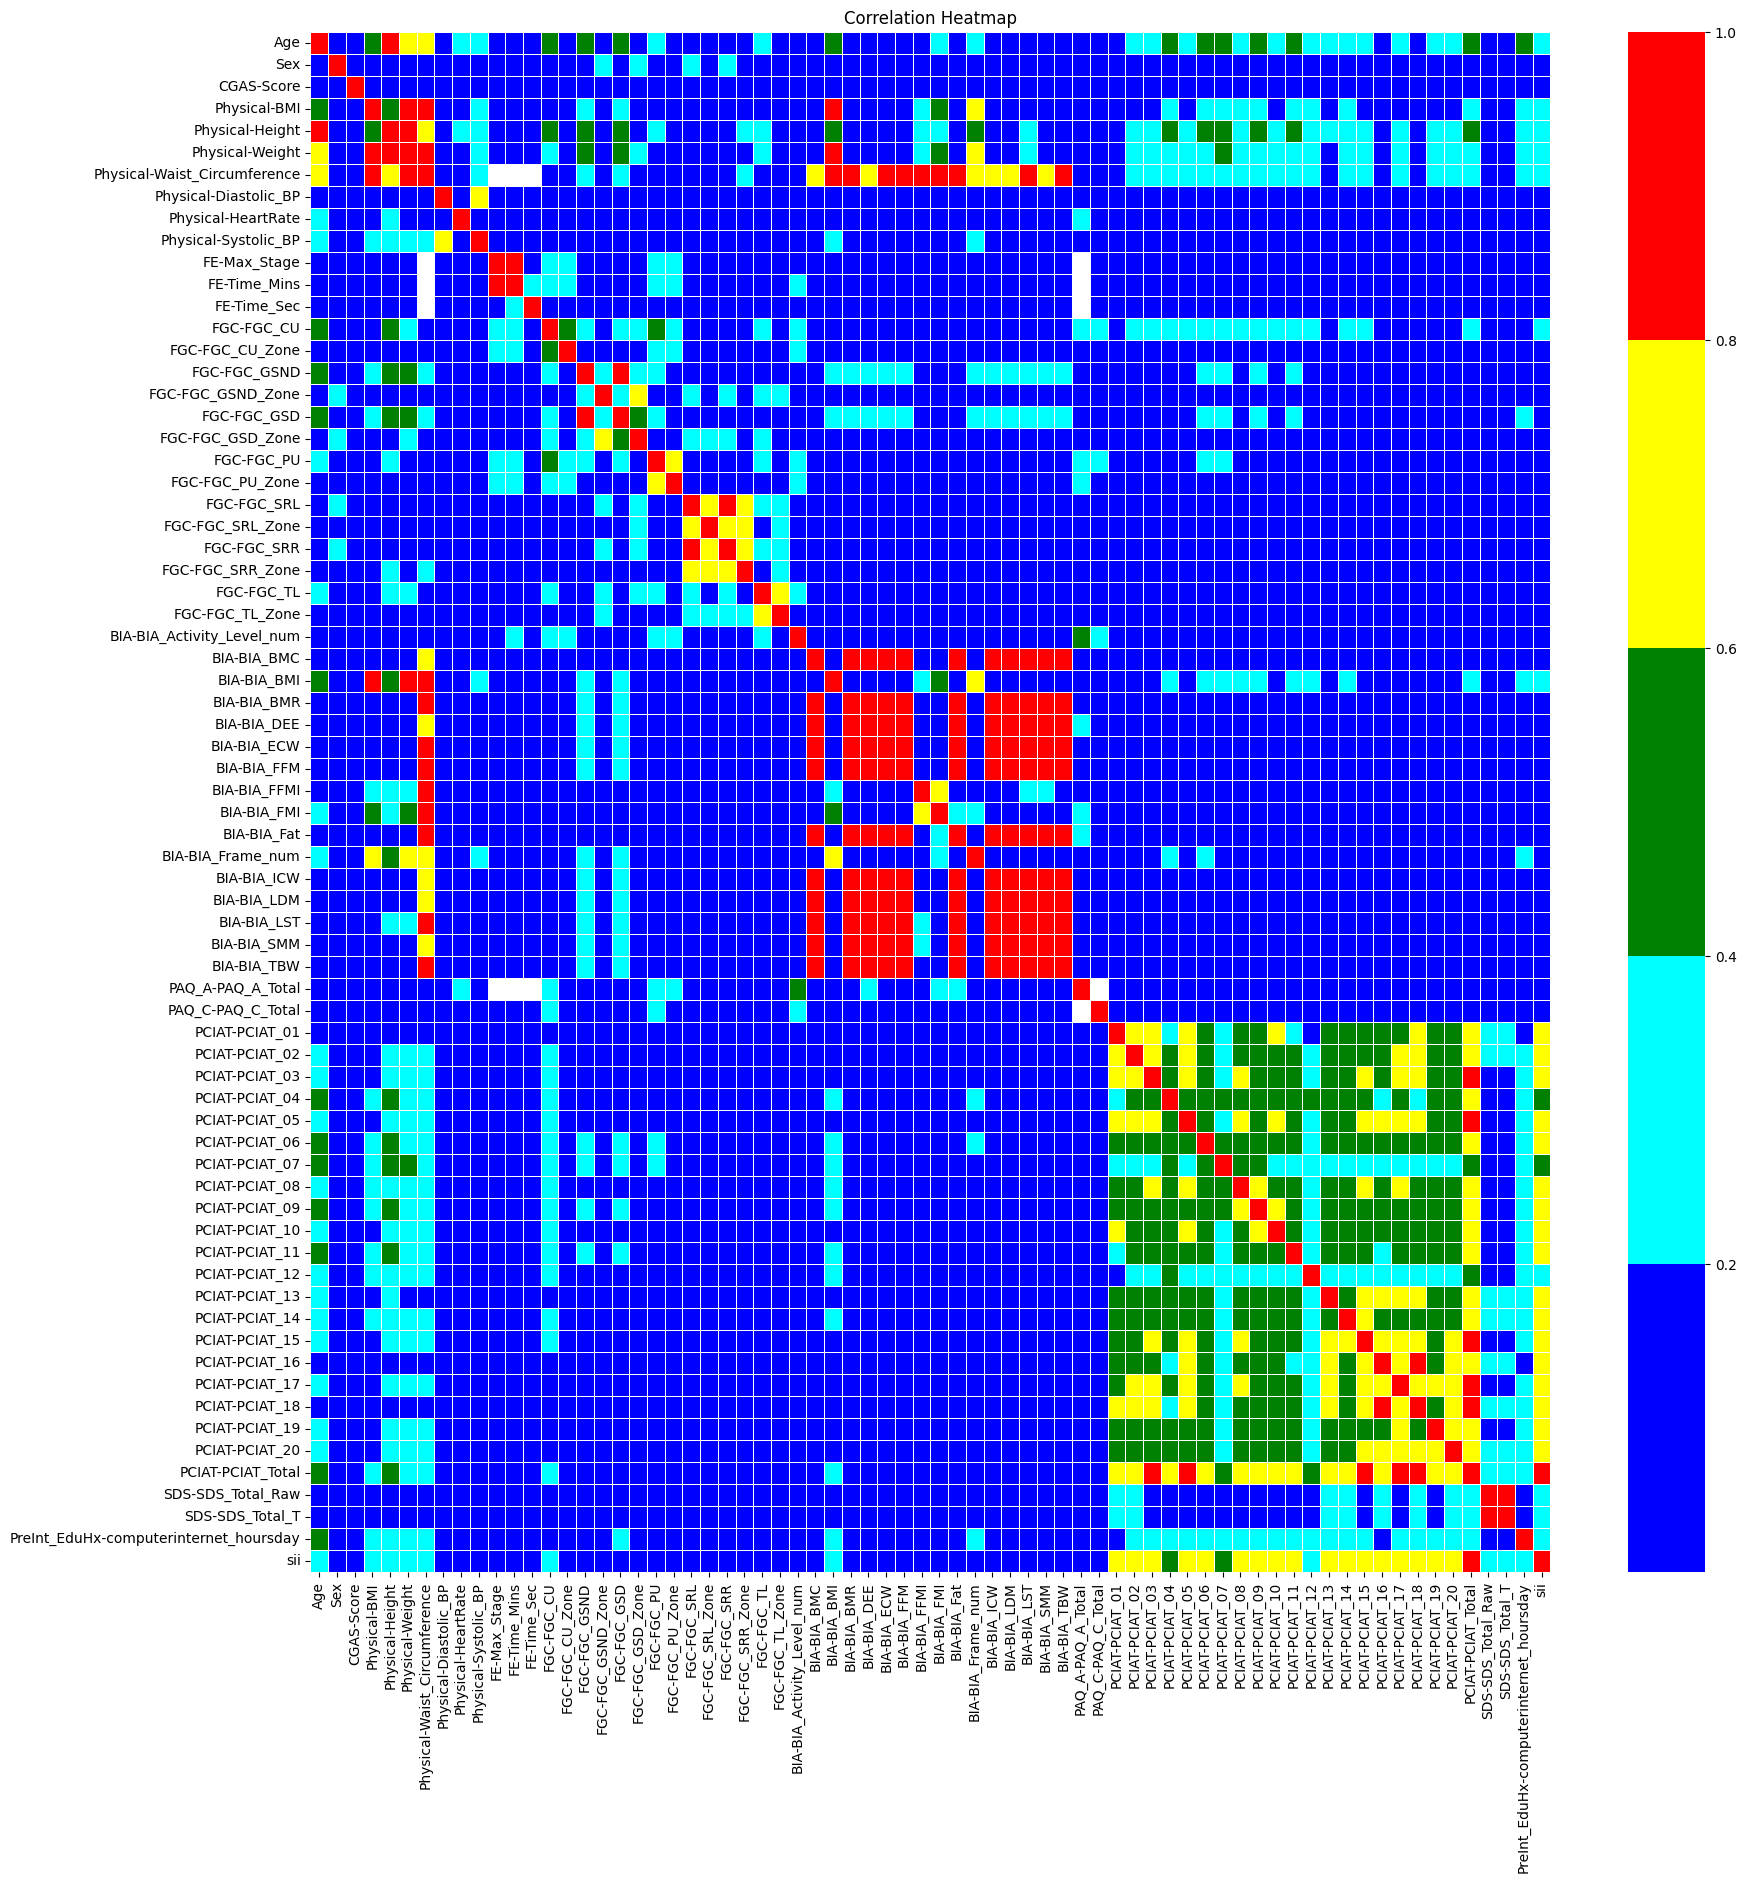

In [167]:
# Select only numeric columns
numeric_df = df_1.select_dtypes(include=[np.number])

# Plot the heatmap to check the correlation between the variables
corr_df = numeric_df.corr().abs()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=False, cmap=['blue', 'cyan', 'green', 'yellow', 'red'], linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [168]:
# Identify columns that have more than 70% correlation with the target variable
sii_corr = numeric_df.corr()['sii'].abs()
sii_corr = sii_corr[sii_corr > 0.7].sort_values(ascending=False)
sii_corr

sii                  1.000000
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_17       0.729867
PCIAT-PCIAT_05       0.722722
PCIAT-PCIAT_13       0.705679
PCIAT-PCIAT_20       0.703013
Name: sii, dtype: float64

In [169]:
# Identify columns that have more than 70% correlation with the target variable
t_corr = numeric_df.corr()['SDS-SDS_Total_T'].abs()
t_corr = t_corr[t_corr > 0.7].sort_values(ascending=False)
t_corr

SDS-SDS_Total_T      1.000000
SDS-SDS_Total_Raw    0.996134
Name: SDS-SDS_Total_T, dtype: float64

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


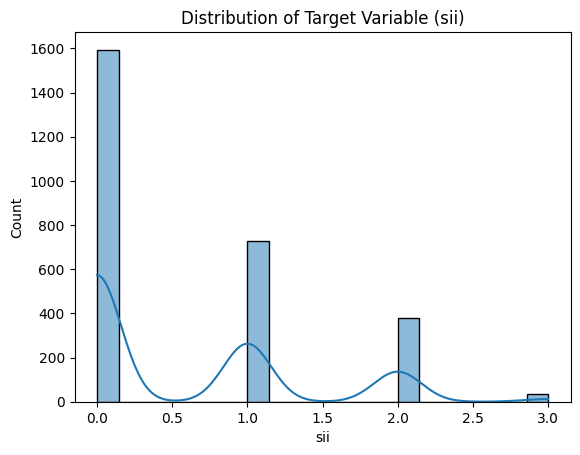

In [170]:
# Distribution of the target variable
sns.histplot(df_1['sii'], kde=True)
plt.title('Distribution of Target Variable (sii)')
plt.show()

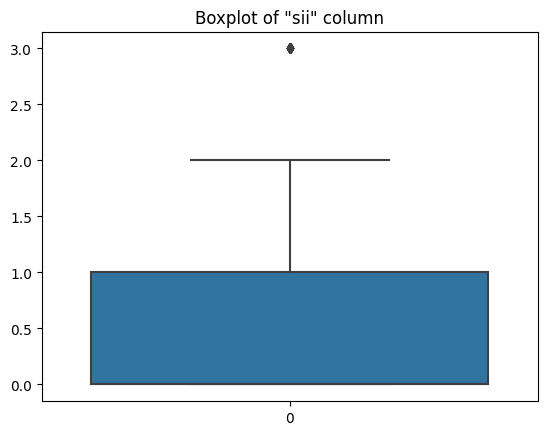

In [171]:
# Boxplot for outlier detection

sns.boxplot(df_1['sii'])
plt.title(f'Boxplot of "sii" column')
plt.show()

# ***Data Collection***

In [172]:
# Read the acceleration data to access additional useful features of each participant
parquet_directory = '../../../QBC8_AI_project_data_Q1/series.parquet'
acceleration_features = []

for folder in os.listdir(parquet_directory):
    folder_path = os.path.join(parquet_directory, folder)
    file_path = os.path.join(folder_path, "part-0.parquet")

    # Access to ID and colloct
    participant_id = folder[3:]

    # Read particular columns (to reduce the time of the data analysis process)
    acceleration_data = pd.read_parquet(file_path, columns=['anglez', 'enmo', 'light', 'non-wear_flag', 'time_of_day', 'weekday'])

    # Collect the expected features from the acceleration data 
    features = {
        'id': participant_id,
        'avg_activity': acceleration_data['enmo'].mean(),
        'std_activity': acceleration_data['enmo'].std(),
        'avg_angle': acceleration_data['anglez'].mean(),
        'std_angle': acceleration_data['anglez'].std(),
        'avg_light': acceleration_data['light'].mean(),
        'non_wear_time': (acceleration_data['non-wear_flag'] == 1).sum() / len(acceleration_data)
    }

    # Collect the activity by time of day and day of week
    acceleration_data['time_period'] = pd.cut(acceleration_data['time_of_day'],
                                              bins=[0, 6*3600000000000, 12*3600000000000, 18*3600000000000, 24*3600000000000],
                                              labels=['night', 'morning', 'afternoon', 'evening'])
    period_means = acceleration_data.groupby('time_period', observed=False)['enmo'].mean()
    for period in ['morning', 'afternoon', 'evening', 'night']:
        features[f'activity_{period}'] = period_means.get(period, 0)

    weekday_means = acceleration_data.groupby('weekday')['enmo'].mean()
    for day in range(1, 8):
        features[f'activity_day_{day}'] = weekday_means.get(day, 0)

    # Add all features to the acceleration features list
    acceleration_features.append(features)

# Create the second dataset based on acceleration data
df_2 = pd.DataFrame(acceleration_features)

In [173]:
# Combine two data sets based on ID column
df = pd.merge(df_1, df_2, on='id', how='inner')

# Check the data information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      996 non-null    object 
 1   Enrol_Season                            996 non-null    object 
 2   Age                                     996 non-null    int64  
 3   Sex                                     996 non-null    int64  
 4   CGAS-Season                             954 non-null    object 
 5   CGAS-Score                              954 non-null    float64
 6   Physical-Season                         992 non-null    object 
 7   Physical-BMI                            985 non-null    float64
 8   Physical-Height                         988 non-null    float64
 9   Physical-Weight                         986 non-null    float64
 10  Physical-Waist_Circumference            47 non-null     float6

,Age,Sex,CGAS-Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,activity_afternoon,activity_evening,activity_night,activity_day_1,activity_day_2,activity_day_3,activity_day_4,activity_day_5,activity_day_6,activity_day_7
count,996.000000,996.000000,954.000000,985.000000,988.000000,986.000000,47.000000,979.000000,979.000000,979.000000,...,996.000000,996.000000,991.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,10.308233,0.346386,64.427673,19.289689,56.121488,90.886613,25.106383,70.077630,81.980592,117.855975,...,0.054226,0.035928,0.011644,0.036186,0.038161,0.038156,0.038426,0.038439,0.035806,0.033633
std,3.462414,0.476057,11.532040,5.041315,7.463518,43.458727,5.957217,14.804593,13.849418,17.708983,...,0.033363,0.024351,0.010330,0.025915,0.028137,0.026573,0.031182,0.027532,0.027919,0.027256
min,5.000000,0.000000,31.000000,0.000000,39.000000,0.000000,19.000000,11.000000,27.000000,62.000000,...,0.000226,0.000010,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,55.250000,15.874194,50.500000,58.600000,21.500000,61.000000,73.000000,107.000000,...,0.029417,0.018148,0.004533,0.016361,0.018705,0.018516,0.017639,0.018145,0.015075,0.014433
50%,10.000000,0.000000,63.000000,17.881836,55.000000,78.600000,23.000000,68.000000,81.000000,114.000000,...,0.051555,0.031894,0.007484,0.033023,0.033657,0.034004,0.034122,0.035233,0.031606,0.028518
75%,12.000000,1.000000,72.000000,21.533192,62.000000,113.900000,26.000000,76.000000,92.000000,126.000000,...,0.075441,0.048335,0.016487,0.050248,0.053653,0.053088,0.053538,0.053455,0.049247,0.046085
max,21.000000,1.000000,95.000000,45.306026,78.000000,315.000000,46.000000,179.000000,138.000000,203.000000,...,0.209586,0.136988,0.070196,0.164222,0.324635,0.171328,0.538214,0.194599,0.287823,0.367011


# ***Data Preproccessing***

In [174]:
# Delete useless columns
columns_to_drop = ['id', 'Physical-Waist_Circumference', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total']
df_train = df.drop(columns=columns_to_drop)
# Delete "PCIAT" columns as decided by Quera team
pciat_columns = [column for column in df_train.columns if column.startswith('PCIAT-')]
df_train = df_train.drop(columns=pciat_columns)

# Separate the categorical and numerical columns
categorical_columns = [column for column in df_train.columns if df_train[column].dtype == 'object']
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Define the methods of filling in missing values (KNN, mean, median)
knn_features = [
    'CGAS-Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 
    'Physical-HeartRate', 'Physical-Systolic_BP','activity_morning', 'activity_afternoon', 'activity_evening', 'activity_night'
    ]
median_features = ['FGC-FGC_CU', 'FGC-FGC_CU_Zone']
mean_features = [column for column in numeric_columns if column not in knn_features and column not in ['FGC-FGC_CU', 'FGC-FGC_CU_Zone']]

# Assign the pipeline method for numerical columns
numeric_pipeline = Pipeline(steps=[
    ('imputer', ColumnTransformer(
        transformers=[
            ('knn', KNNImputer(n_neighbors=5), knn_features),
            ('mean', SimpleImputer(strategy='mean'), mean_features),
            ('median', SimpleImputer(strategy='median'), median_features)
        ]
    )),
    ('scaler', StandardScaler())
])

# Assign the pipeline method for categorical columns (by OneHotEndcoder method)
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine both processes
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_pipeline, numeric_columns),
        ('categorical', categorical_pipeline, categorical_columns)
    ])

# Assign the main pipeline process after the combination (by PolynomialFeatures)
main_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=1, include_bias=False))
])

# Set pipeline process on the dataset
pipeline_process_output = main_pipeline.fit_transform(df_train)

# Columns name modification and create the training dataset
categorical_feature_names = main_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_columns).tolist()
feature_names = main_pipeline.named_steps['polynomial'].get_feature_names_out(numeric_columns + categorical_feature_names)
train_data = pd.DataFrame(pipeline_process_output, columns=feature_names)

# Check the training dataset status
train_data.info()
train_data.describe()

# Check the number of missing values in the training dataset
train_data.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Columns: 108 entries, Age to PreInt_EduHx-Season_nan
dtypes: float64(108)
memory usage: 840.5 KB


np.int64(0)

# ***Exploratory Data Analysis (EDA)***

# ***Model Training Proccess***

In [175]:
# Convert 'sii' to categorical labels
bins = [train_data['sii'].min(), train_data['sii'].quantile(0.33), train_data['sii'].quantile(0.66), train_data['sii'].max()]
labels = [0, 1, 2]
train_data['sii'] = pd.cut(train_data['sii'], bins=bins, labels=labels, include_lowest=True)

# Assign features and target columns
X = train_data.drop('sii', axis=1)
y = train_data['sii']

# Separate train, validation, and test data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


In [176]:
# Use RandomForestClassifier as the basic algorithm
model = RandomForestClassifier(random_state=42)
model.fit(X_train_val, y_train_val)

# Tuning process of hyperparameters
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7],
    'max_leaf_nodes': [None, 9, 10, 15, 20],
    'min_samples_split': [2, 5, 8, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)

# Best parameters and best estimator
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score after tune: {:.2f}".format(grid_search.best_score_))

# Use the best model for predictions
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_split': 8, 'n_estimators': 100}
Best cross-validation score after tune: 0.99


In [177]:
# Evaluate the model on validation data
y_val_pred = best_model.predict(X_val)

# Calculate evaluation metrics on validation data
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val, best_model.predict_proba(X_val), multi_class='ovr', average='weighted')

# Display the evaluations metrics  based on validation data
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 score:", f1_val)
print("AUC:", auc_val)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
AUC: 1.0


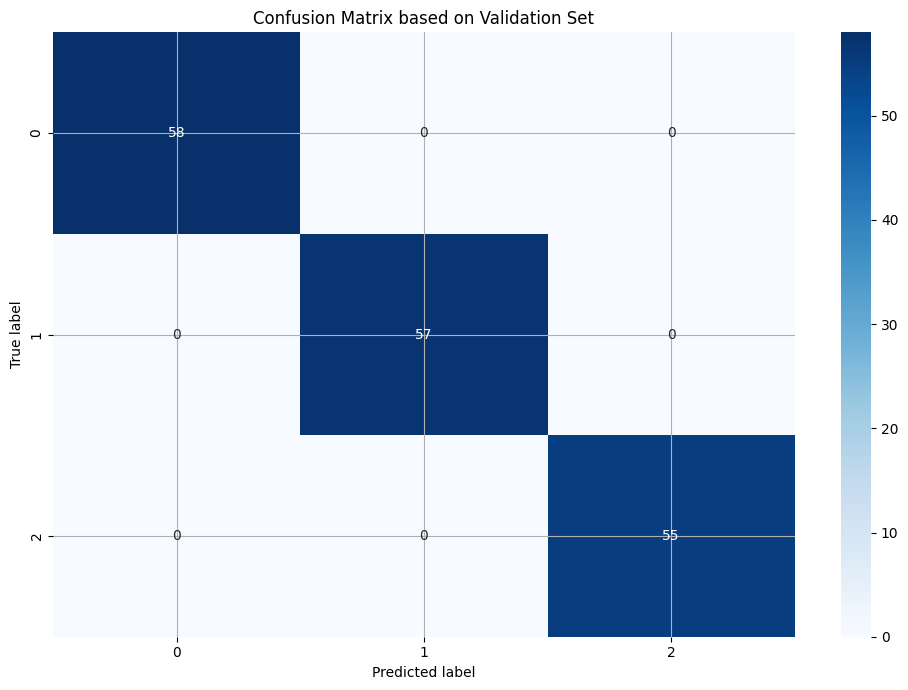

In [178]:
# Confusion Matrix based on validation data
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix based on Validation Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.grid()
plt.show()

In [179]:
# Evaluate the model on test data
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Display the evaluation metrics based on test data
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 score:", f1_test)
print("AUC:", auc_test)

Accuracy: 0.9666666666666667
Precision: 0.967759433962264
Recall: 0.9666666666666667
F1 score: 0.96664705305482
AUC: 0.9954356902356903


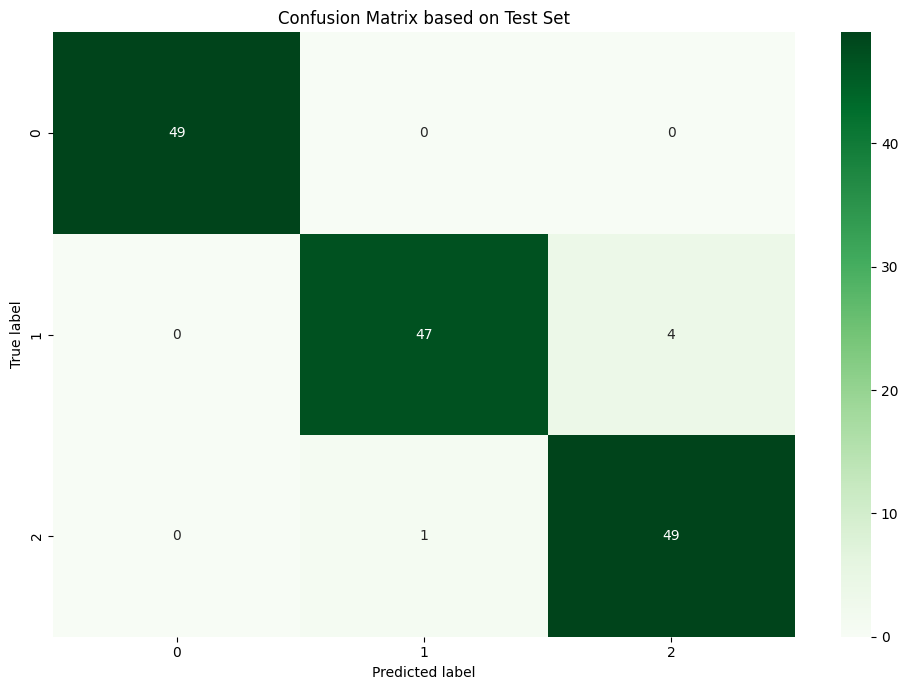

In [180]:
# Confusion Matrix based on test data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix based on Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ***Model Monitoring***

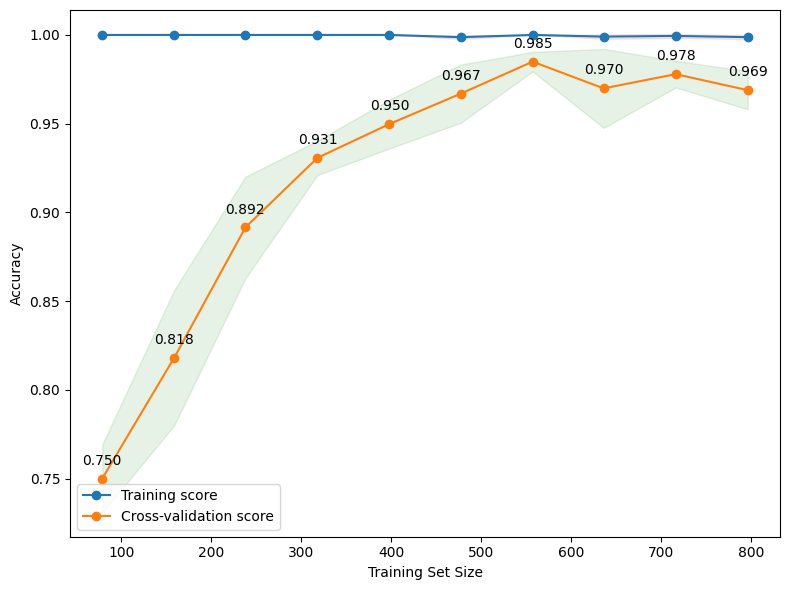

In [183]:

train_sizes, train_scores, val_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Display plot for visualization
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')

# Fill the area around the line plots to show the variance of the scores
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, 
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, 
                 alpha=0.1, color="g")

# Annotate scores on the plot
for i, score in enumerate(val_scores_mean):
    plt.annotate(f'{score:.3f}', (train_sizes[i], score), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [185]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test == class_of_interest, best_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.fill_between(recall, precision, 0.34, color='purple', alpha=0.2, hatch='/')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.tight_layout()
plt.show()

NameError: name 'class_of_interest' is not defined

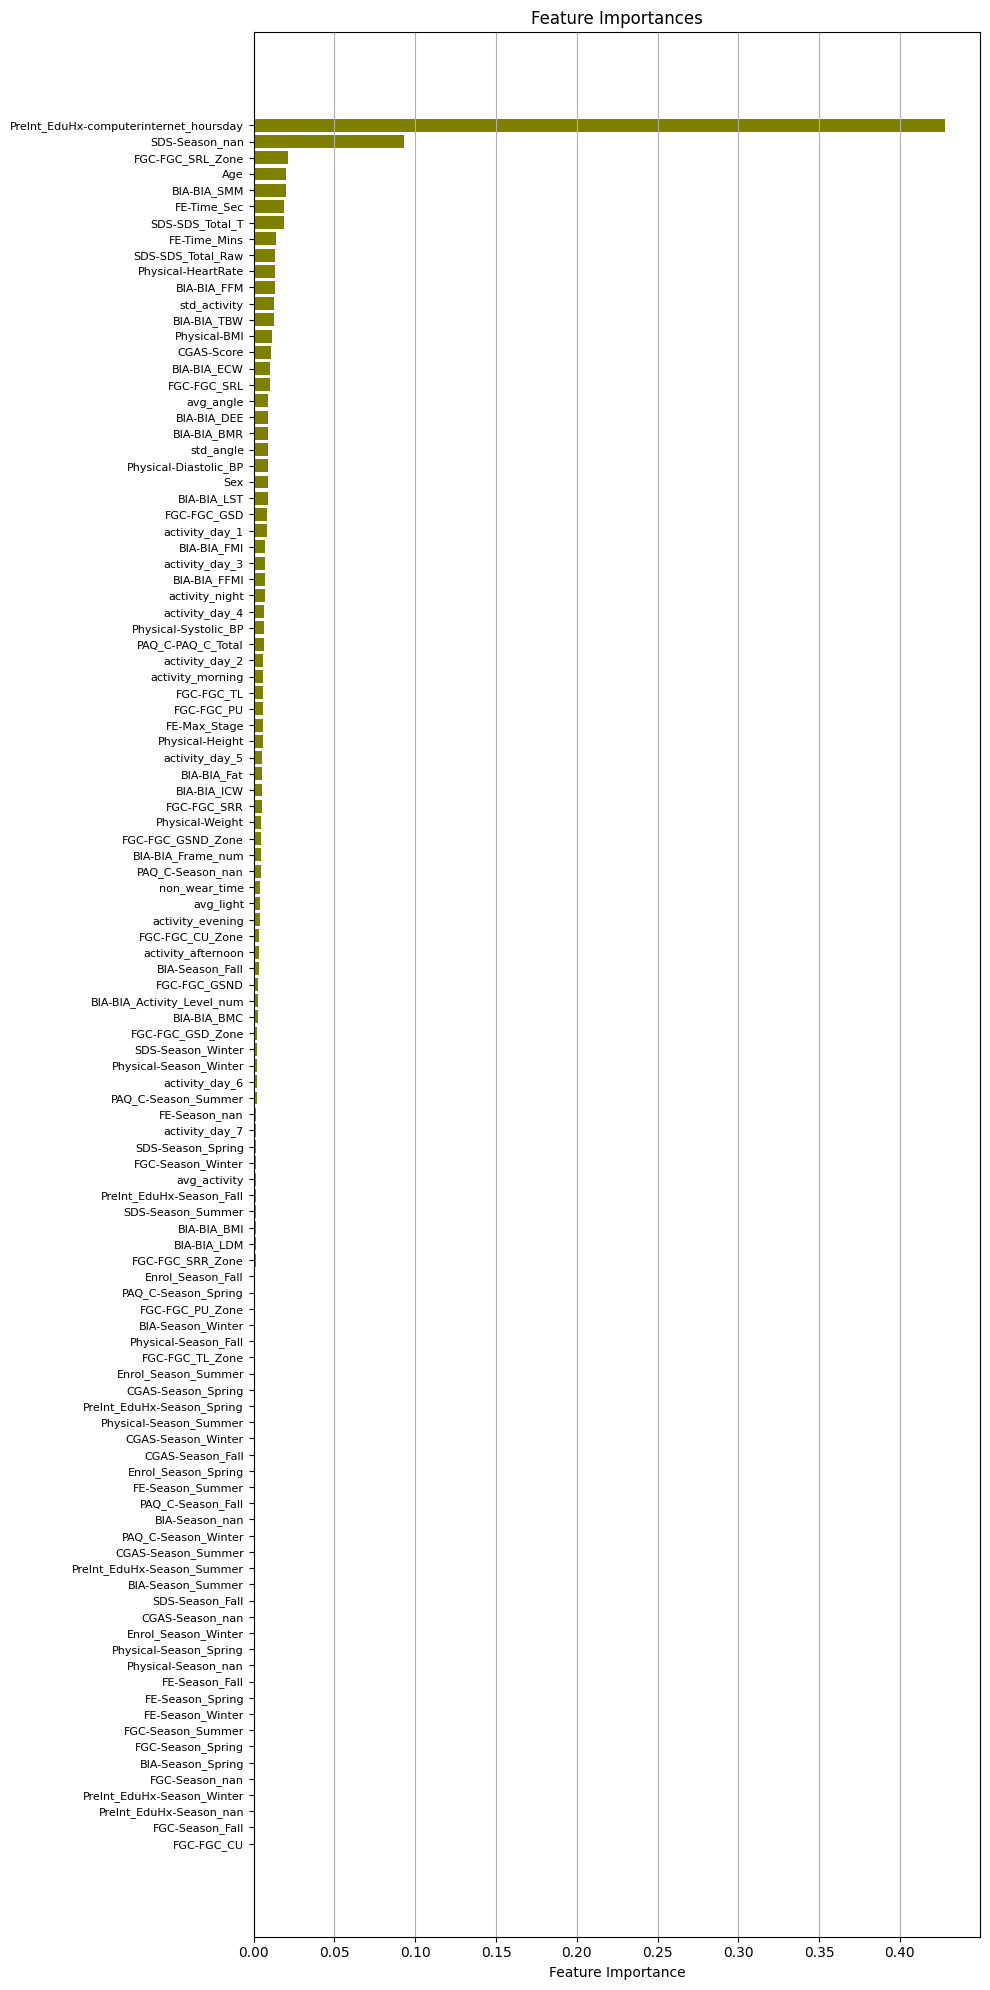

In [204]:
# Display significance of features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(10, 20))

ax.barh(pos, feature_importance[sorted_idx], align='center', color='olive')
ax.set_yticks(pos[::1])
ax.set_yticklabels(np.array(X.columns)[sorted_idx][::1], fontsize=8)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances')
plt.grid(axis='x')
plt.tight_layout()
plt.show()